## 作业1：跳伞运动员仿真
1、设有一个系统，它的微分方程为：
$$\ddot{y}+3\dot{y}+2y=\dot{u}+u$$
已知系统的初始条件为：
$$\dot{y}(0)=1,y(0)=1,u(0)=0$$
试确定该系统的内部模型，并给出状态变量的初值。
   
2、现有洛伦兹吸引子的一组微分方程组：
$$\frac{dx}{dt}=\sigma(y-x),\frac{dy}{dt}=x(\rho-z)-y,\frac{dz}{dt}=xy-\beta{z}$$
设参数值为：
$$\sigma=10,\rho=28,\beta=\frac{8}{3}$$
试编写Python程序画出洛伦兹吸引子的曲线。

3、试采用Python实现前向Euler、二阶Adams、三阶Adams和四阶Runge-Kutta法四种数值积分，并使用降落伞仿真比较几种数值积分的精度。

作业要求：写成ipynb文件提交，代码和曲线结果嵌入在文件里。

1.
设有一个系统，它的微分方程为：
$$\ddot{y}+3\dot{y}+2y=\dot{u}+u$$
已知系统的初始条件为：
$$\dot{y}(0)=1,y(0)=1,u(0)=0$$
试确定该系统的内部模型，并给出状态变量的初值。

In [443]:
from sympy import symbols, Eq, Function, dsolve, Derivative, solve

# 定义变量和函数
t = symbols('t')
y = Function('y')(t)
u = Function('u')(t)
dy = y.diff(t)  # y'(t)
ddy = y.diff(t, t)  # y''(t)
du = u.diff(t)  # u'(t)

# 给定微分方程
equation = Eq(ddy + 3 * dy + 2 * y, du + u)

# 假设u(t)=0 求解y(t) (为了简单起见，求齐次解)
solution = dsolve(equation.subs(u, 0))

# Display the solution
solution


Eq(y(t), (C1 + C2*exp(-t))*exp(-t))

微分方程 $\ddot{y}+3\dot{y}+2y=\dot{u}+u$ 在 $u(t)=0$ 时的齐次解为:
$$y(t)=(C_1+C_2e^{-t})e^{-t}$$

接下来计算常量 $C_1$ 和 $C_2$

计算时使用 $\dot{y}(0)=1,y(0)=1$

In [444]:
from sympy import exp

# 定义常量
C_1, C_2 = symbols('C_1 C_2')

# 写出y(t)及其导数
y_t = (C_1 + C_2 * exp(-t)) * exp(-t)
dy_t = y_t.diff(t)

# 初始条件方程
init_conditions_eqs = [
    Eq(y_t.subs(t, 0), 1),  # y(0) = 1
    Eq(dy_t.subs(t, 0), 1)  # dy(0) = 1
]

# 求解 C_1和C_2
constants = solve(init_conditions_eqs, (C_1, C_2))
constants


{C_1: 3, C_2: -2}

常量 $C_1$和$C_2$ 的值:
$$C_1=3$$
$$C_2=-2$$

函数 $y(t)$ 的表达式:
$$y(t)=(3-2e^{-t})e^{-t}$$

为了确定状态空间表示（内部模型）和初始状态值，将该微分方程转换为状态空间形式。

原方程为:
$$\ddot{y}+3\dot{y}+2y=\dot{u}+u$$

选择状态变量:
$$x_1=y$$
$$x_2=\dot{y}$$

可得状态方程:
$$\dot{x_1}=x2$$
$$\dot{x_2}=\dot{u}+u-3x_2-2x_1$$

接下来计算 $x_1$和$x_2$ 的初始值

In [445]:
# 根据 y和dy 定义 x1和x2 的初始值
x1_0 = y_t.subs(t, 0).subs(constants)  # y(0)
x2_0 = dy_t.subs(t, 0).subs(constants)  # dy(0)

x1_0, x2_0

(1, 1)

状态变量的初始值为:
$$x_1(0)=1$$
$$x_2(0)=1$$

综上所述，系统状态空间形式的内部模型为:
$$\dot{x_1}=x2$$
$$\dot{x_2}=\dot{u}+u-3x_2-2x_1$$

对应的初始状态变量值:
$$x_1(0)=1$$
$$x_2(0)=1$$

2.
现有洛伦兹吸引子的一组微分方程组：
$$\frac{dx}{dt}=\sigma(y-x),\frac{dy}{dt}=x(\rho-z)-y,\frac{dz}{dt}=xy-\beta{z}$$
设参数值为：
$$\sigma=10,\rho=28,\beta=\frac{8}{3}$$
试编写Python程序画出洛伦兹吸引子的曲线。

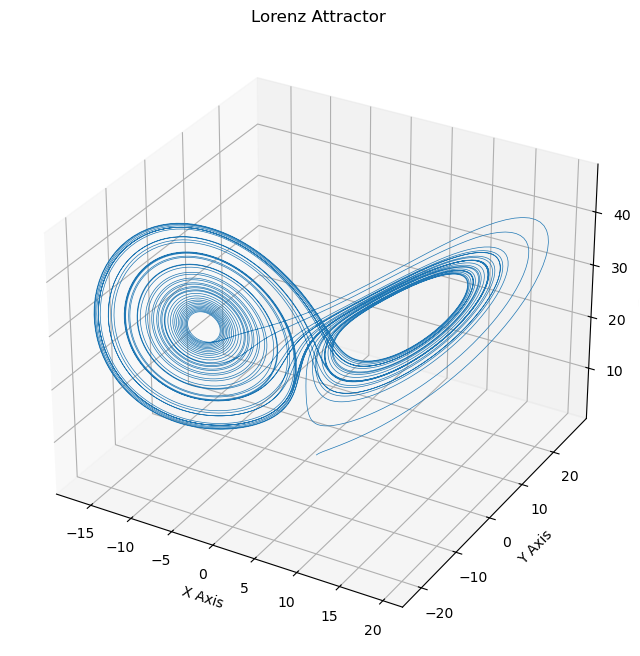

In [446]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 洛伦兹吸引子微分方程组参数值
sigma = 10
rho = 28
beta = 8/3

# 洛伦兹吸引子微分方程组
def lorenz(t, state):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# 初始条件
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000) # 时间向量

# 解微分方程
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval, method='RK45')

# 绘图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution.y[0], solution.y[1], solution.y[2], lw=0.5)
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
plt.show()

3.
试采用Python实现前向Euler、二阶Adams、三阶Adams和四阶Runge-Kutta法四种数值积分，并使用降落伞仿真比较几种数值积分的精度。

第一步 分析问题

假设跳伞时水平方向速度始终为0，仅考虑垂直下落
$$g: 重力加速度 (米/平方秒 | m/s^2)$$
$$Rho: 大气密度 (千克/立方米 | kg/m^3)$$
$$S: 表面积 (平方米 | m^2)$$
$$C_d: 阻力系数 (无量纲)$$
$$m: 跳伞人员质量 (千克 | kg)$$
$$A_z: 当前垂直加速度 (米/平方秒 | m/s^2)$$
$$V_z: 当前垂直速度 (米/秒 | m/s)$$
$$h: 当前高度 (米 | m)$$
$$t: 当前时间 (秒 | s)$$
$$D: 阻力 (牛顿 | N)$$
$$step: 仿真步长-时间 (秒 | s)$$
$$(g, Rho 需要根据当前高度进行计算)$$

公式:
$$D = 1/2 * C_d * Rho * s * V_z^2$$
$$A_z = D / m - g$$

第二步 编写基础函数

1. ISA_calc()

由于 g, Rho 需要根据当前高度进行计算，引入根据高度计算大气密度的函数ISA_calc()

(此部分代码在上学期学习飞机性能课程时开发 不在此处进行解释和分析)

(本代码由 胡天翔 / Hu Tianxiang 编写)

In [447]:
# 引入根据高度计算大气密度的函数

'''
ISA_calc()
by Hu Tianxiang
'''

import math
import numpy as np

def ISA_calc(h):
    H_lowest, H0, H1, H2, H3, H4, H5, H6, H7 = -610, 0, 11000, 20000, 32000, 47000, 51000, 71000, 84852
    R, M, Re, Gamma = 8.3144598, 0.0289644, 6371000, 1.4
    R_special = R / M
    T0, P0, Rho0, g0 = 288.15, 1013.25, 1.225, 9.80665

    Lambda0to1, Lambda2to3, Lambda3to4, Lambda5to6, Lambda6to7 = -0.0065, 0.0010, 0.0028, -0.0028, -0.0020

    T1to2 = T0 + Lambda0to1 * H1
    T3 = T1to2 + Lambda2to3 * (H3 - H2)
    T4to5 = T3 + Lambda3to4 * (H4 - H3)
    T6 = T4to5 + Lambda5to6 * (H6 - H5)

    P1 = P0 * (1 + Lambda0to1 * (H1 - H0) / T0)**(-g0 / (R_special * Lambda0to1))
    P2 = P1 * math.exp(-g0 * (H2 - H1) / (R_special * T1to2))
    P3 = P2 * (1 + Lambda2to3 * (H3 - H2) / T1to2)**(-g0 / (R_special * Lambda2to3))
    P4 = P3 * (1 + Lambda3to4 * (H4 - H3) / T3)**(-g0 / (R_special * Lambda3to4))
    P5 = P4 * math.exp(-g0 * (H5 - H4) / (R_special * T4to5))
    P6 = P5 * (1 + Lambda5to6 * (H6 - H5) / T4to5)**(-g0 / (R_special * Lambda5to6))

    Rho1 = Rho0 * (1 + Lambda0to1 * (H1 - H0) / T0)**(-g0 / (R_special * Lambda0to1) - 1)
    Rho2 = Rho1 * math.exp(-g0 * (H2 - H1) / (R_special * T1to2))
    Rho3 = Rho2 * (1 + Lambda2to3 * (H3 - H2) / T1to2)**(-g0 / (R_special * Lambda2to3) - 1)
    Rho4 = Rho3 * (1 + Lambda3to4 * (H4 - H3) / T3)**(-g0 / (R_special * Lambda3to4) - 1)
    Rho5 = Rho4 * math.exp(-g0 * (H5 - H4) / (R_special * T4to5))
    Rho6 = Rho5 * (1 + Lambda5to6 * (H6 - H5) / T4to5)**(-g0 / (R_special * Lambda5to6) - 1)

    if h < H_lowest:
        print()
        print('Error: The altitude should between -610m ~ 51000m')
        print('Your altitude is', h, 'm')
        print('T P Rho a will be -1')
        print()
        T, P, Rho, a, g = -1, -1, -1, -1, -1
    elif h < H0:
        T = T0 + Lambda0to1 * (h - H0)
        P = P0 * (1 + Lambda0to1 * (h - H0) / T0)**(-g0 / (R_special * Lambda0to1))
        Rho = Rho0 * (1 + Lambda0to1 * (h - H0) / T0)**(-g0 / (R_special * Lambda0to1) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H1:
        T = T0 + Lambda0to1 * (h - H0)
        P = P0 * (1 + Lambda0to1 * (h - H0) / T0)**(-g0 / (R_special * Lambda0to1))
        Rho = Rho0 * (1 + Lambda0to1 * (h - H0) / T0)**(-g0 / (R_special * Lambda0to1) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H2:
        T = T1to2
        P = P1 * math.exp(-g0 * (h - H1) / (R_special * T1to2))
        Rho = Rho1 * math.exp(-g0 * (h - H1) / (R_special * T1to2))
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H3:
        T = T1to2 + Lambda2to3 * (h - H2)
        P = P2 * (1 + Lambda2to3 * (h - H2) / T1to2)**(-g0 / (R_special * Lambda2to3))
        Rho = Rho2 * (1 + Lambda2to3 * (h - H2) / T1to2)**(-g0 / (R_special * Lambda2to3) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H4:
        T = T3 + Lambda3to4 * (h - H3)
        P = P3 * (1 + Lambda3to4 * (h - H3) / T3)**(-g0 / (R_special * Lambda3to4))
        Rho = Rho3 * (1 + Lambda3to4 * (h - H3) / T3)**(-g0 / (R_special * Lambda3to4) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H5:
        T = T4to5
        P = P4 * math.exp(-g0 * (h - H4) / (R_special * T4to5))
        Rho = Rho4 * math.exp(-g0 * (h - H4) / (R_special * T4to5))
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h < H6:
        T = T4to5 + Lambda5to6 * (h - H5)
        P = P5 * (1 + Lambda5to6 * (h - H5) / T4to5)**(-g0 / (R_special * Lambda5to6))
        Rho = Rho5 * (1 + Lambda5to6 * (h - H5) / T4to5)**(-g0 / (R_special * Lambda5to6) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    elif h <= H7:
        T = T6 + Lambda6to7 * (h - H6)
        P = P6 * (1 + Lambda6to7 * (h - H6) / T6)**(-g0 / (R_special * Lambda6to7))
        Rho = Rho6 * (1 + Lambda6to7 * (h - H6) / T6)**(-g0 / (R_special * Lambda6to7) - 1)
        a = math.sqrt(Gamma * R_special * T)
        g = g0 * (Re / (Re + h))**2
    else:
        print()
        print('Error: The altitude should between -610m ~ 51000m')
        print('Your altitude is', h, 'm')
        print('T P Rho a will be -2')
        print()
        T, P, Rho, a, g = -2, -2, -2, -2, -2

    return T, P, Rho, a, g

2. acceleration_calc()

计算当前状态下的垂直加速度

In [448]:
# 计算当前状态下的垂直加速度
def acceleration_calc(h, V_z, S, C_d, m):
    '''
    计算当前状态下的垂直加速度
    参数:
        h: 高度 (米 | m)
        V_z: 速度 (米/秒 | m/s)
        S: 降落伞表面积 (平方米 | m^2)
        C_d: 阻力系数 (无量纲)
    返回值:
        A_z: 当前状态下的垂直加速度 (米/平方秒 | m/s^2)
    '''

    # 使用ISA_calc()得到当前高度下的大气数据
    '''
    此处只需要大气密度Rho及重力加速度g
    Rho: 大气密度 (千克/立方米 | kg/m^3)
    g: 重力加速度 (米/平方秒 | m/s^2)
    '''
    _, _, Rho, _, g = ISA_calc(h)

    # 计算垂直方向上的阻力
    '''
    各变量已在参数中解释
    D: 阻力 (牛顿 | N)
    公式: D = 1/2 * C_d * Rho * s * V_z^2
    '''
    D = 0.5 * C_d * Rho * S * V_z**2

    # 计算垂直加速度
    '''
    公式: A_z = D / m - g
    '''
    A_z = D / m - g

    # 返回值
    return A_z

第三步 实现数值积分方法

a. 前向Euler方法：使用当前的导数值更新下一个步长的值

b. 二阶Adams方法：使用当前和上一步的导数值来预测下一个值

c. 三阶Adams方法：使用当前及前两步的导数值

d. 四阶Runge-Kutta方法：通过计算四个不同点的斜率的加权平均来更新

a. 前向Euler方法

In [449]:
# 前向Euler方法
def forward_euler(f, t, h, V_z, S, C_d, m, step):
    '''
    参数:
        t: 当前时间 (秒 | s)
        f: 导数函数(acceleration_calc() 计算当前状态下的垂直加速度)
        h: 当前高度 (米 | m)
        V_z: 当前垂直速度 (米/秒 | m/s)
        S: 降落伞表面积 (平方米 | m^2)
        C_d: 阻力系数 (无量纲)
        A_z: 当前状态下的垂直加速度 (米/平方秒 | m/s^2)
    返回值:
        t_next: 单步长时间后的时间 (秒 | s)
        V_next: 单步长时间后的垂直速度 (米/秒 | m/s)
        H_next: 单步长时间后的高度 (米 | m)
    '''

    # 使用导数函数f()即acceleration_calc()得到当前状态下的垂直加速度
    A_z = acceleration_calc(h, V_z, S, C_d, m)

    # 计算单步长时间后的垂直速度
    V_z_next = V_z + step * A_z

    # 使用当前垂直速度计算单步长时间后的高度
    h_next = h + step * V_z
    
    # 时间前进一个步长
    t_next = t + step

    # 返回值
    return t_next, V_z_next, h_next

b. 二阶Adams方法

In [450]:
# 二阶Adams方法
def adams_bashforth_2nd_order(f, t, h, V_z, h_prev, V_z_prev, S, C_d, m, step):
    '''
    使用时需要先用Forward Euler方法计算一个时间步长
    参数:
        f: 导数函数(acceleration_calc() 计算当前状态下的垂直加速度)
        h: 当前高度 (米 | m)
        V_z: 当前垂直速度 (米/秒 | m/s)
        h_prev: 一个时间步长之前的高度 (米 | m)
        V_z_prev: 一个时间步长之前的垂直速度 (米/秒 | m/s)
        S: 降落伞表面积 (平方米 | m^2)
        C_d: 阻力系数 (无量纲)
        A_z: 当前状态下的垂直加速度 (米/平方秒 | m/s^2)
    返回值:
        V_next: 单步长时间后的垂直速度 (米/秒 | m/s)
        H_next: 单步长时间后的高度 (米 | m)
    '''

    # 计算两步的导数 - 使用导数函数f()即acceleration_calc()得到当前状态、一个时间步长之前的垂直加速度
    A_z = f(h, V_z, S, C_d, m)
    A_z_prev = f(h_prev, V_z_prev, S, C_d, m)

    # 二阶Adams-Bashforth步进 - 计算单步长时间后的垂直速度
    V_z_next = V_z + (1.5*A_z - 0.5*A_z_prev) * step

    # 二阶Adams-Bashforth步进 - 计算单步长时间后的高度
    h_next = h + (1.5*V_z - 0.5*V_z_prev) * step

    # 时间前进一个步长
    t_next = t + step

    return t_next, V_z_next, h_next

c. 三阶Adams方法

In [451]:
# 三阶Adams方法
def adams_bashforth_3rd_order(f, t, h, V_z, h_prev_1, V_z_prev_1, h_prev_2, V_z_prev_2, S, C_d, m, step):
    '''
    使用时需要先用Forward Euler方法计算两个时间步长
    参数:
        f: 导数函数(acceleration_calc() 计算当前状态下的垂直加速度)
        h: 当前高度 (米 | m)
        V_z: 当前垂直速度 (米/秒 | m/s)
        h_prev_1: 一个时间步长之前的高度 (米 | m)
        V_z_prev_1: 一个时间步长之前的垂直速度 (米/秒 | m/s)
        h_prev_2: 两个时间步长之前的高度 (米 | m)
        V_z_prev_2: 两个时间步长之前的垂直速度 (米/秒 | m/s)
        S: 降落伞表面积 (平方米 | m^2)
        C_d: 阻力系数 (无量纲)
        A_z: 当前状态下的垂直加速度 (米/平方秒 | m/s^2)
    返回值:
        V_next: 单步长时间后的垂直速度 (米/秒 | m/s)
        H_next: 单步长时间后的高度 (米 | m)
    '''

    # 计算三步的导数 - 使用导数函数f()即acceleration_calc()得到当前状态、一个时间步长之前、两个时间步长的垂直加速度
    A_z = f(h, V_z, S, C_d, m)
    A_z_prev_1 = f(h_prev_1, V_z_prev_1, S, C_d, m)
    A_z_prev_2 = f(h_prev_2, V_z_prev_2, S, C_d, m)

    # 三阶Adams-Bashforth步进 - 计算单步长时间后的垂直速度
    V_z_next = V_z + (23/12*A_z - 4/3*A_z_prev_1 + 5/12*A_z_prev_2) * step

    # 三阶Adams-Bashforth步进 - 计算单步长时间后的高度
    h_next = h + (23/12*V_z - 4/3*V_z_prev_1 + 5/12*V_z_prev_2) * step

    # 时间前进一个步长
    t_next = t + step

    return t_next, V_z_next, h_next

4. 四阶Runge-Kutta方法

In [452]:
# 四阶Runge-Kutta方法
def runge_kutta_4th_order(f, t, h, V_z, S, C_d, m, step):
    '''
    参数:
        t: 当前时间 (秒 | s)
        f: 导数函数(acceleration_calc() 计算当前状态下的垂直加速度)
        h: 当前高度 (米 | m)
        V_z: 当前垂直速度 (米/秒 | m/s)
        S: 降落伞表面积 (平方米 | m^2)
        C_d: 阻力系数 (无量纲)
        A_z: 当前状态下的垂直加速度 (米/平方秒 | m/s^2)
    返回值:
        t_next: 单步长时间后的时间 (秒 | s)
        V_next: 单步长时间后的垂直速度 (米/秒 | m/s)
        H_next: 单步长时间后的高度 (米 | m)
    '''

    # 计算速度
    # 使用导数函数f()即acceleration_calc()得到k1_V_z、k2_V_z、k3_V_z、k4_V_z
    '''
    计算大气密度需要当前高度h
    直接使用当前高度计算k2_V_z、k3_V_z、k4_V_z显然是不太符合物理模型的
    此处使用forward_euler方法(不再单独写函数)为k2_V_z、k3_V_z、k4_V_z计算对应的h
    '''
    k1_V_z = acceleration_calc(h, V_z, S, C_d, m)
    h_k2_V_z = h + 1/2*step*V_z
    k2_V_z = acceleration_calc(h_k2_V_z, V_z + 1/2*step*k1_V_z, S, C_d, m)
    h_k3_V_z = h + 1/2*step*V_z
    k3_V_z = acceleration_calc(h_k3_V_z, V_z + 1/2*step*k2_V_z, S, C_d, m)
    h_k4_V_z = h + step*V_z
    k4_V_z = acceleration_calc(h_k4_V_z, V_z + step*k3_V_z, S, C_d, m)

    # 四阶Runge-Kutta步进 - 计算单步长时间后的垂直速度
    V_z_next = V_z + (k1_V_z + 2*k2_V_z + 2*k3_V_z + k4_V_z) * step / 6

    # 计算高度
    # 计算k1_h、k2_h、k3_h、k4_h
    A_z = acceleration_calc(h, V_z, S, C_d, m)
    k1_h = V_z
    k2_h = V_z + 1/2*step*A_z
    k3_h = V_z + 1/2*step*A_z
    k4_h = V_z + step*A_z

    # 四阶Runge-Kutta步进 - 计算单步长时间后的高度
    h_next = h + (k1_h + 2*k2_h + 2*k3_h + k4_h) * step / 6

    # 时间前进一个步长
    t_next = t + step

    # 返回值
    return t_next, V_z_next, h_next

第四步 使用各方法进行计算

再次给出各个变量的含义:
$$g: 重力加速度 (米/平方秒 | m/s^2)$$
$$Rho: 大气密度 (千克/立方米 | kg/m^3)$$
$$S: 表面积 (平方米 | m^2)$$
$$C_d: 阻力系数 (无量纲)$$
$$m: 跳伞人员质量 (千克 | kg)$$
$$A_z: 当前垂直加速度 (米/平方秒 | m/s^2)$$
$$V_z: 当前垂直速度 (米/秒 | m/s)$$
$$h: 当前高度 (米 | m)$$
$$t: 当前时间 (秒 | s)$$
$$D: 阻力 (牛顿 | N)$$
$$step: 仿真步长-时间 (秒 | s)$$
$$(g, Rho 需要根据当前高度进行计算)$$

给定初始条件
$$初始时间t_0: 0$$
$$初始速度v_0: 0$$
$$初始高度h_0: 3000$$
$$结束: 落到地面$$
$$时间步长step: 0.01$$

In [453]:
# 给定初始条件
S = 1.0
C_d = 0.05
m = 80
step = 0.01

t_0 = 0
V_z_0 = 0
h_0 = 3000

a. 使用前向Euler方法计算

In [454]:
# 使用前向Euler方法计算

# 初始化
t_arr_forward_euler = [0]
V_z_arr_forward_euler = [0]
h_arr_forward_euler = [3000]
t = t_0
V_z = V_z_0
h = h_0

# 使用前向Euler方法计算全部数据
while h>0:
    t_next, V_z_next, h_next = forward_euler(acceleration_calc, t, h, V_z, S, C_d, m, step)
    t_arr_forward_euler.append(t_next)
    V_z_arr_forward_euler.append(abs(V_z_next))
    h_arr_forward_euler.append(h_next)
    t, V_z, h = t_next, V_z_next, h_next

b. 使用二阶Adams方法计算

In [455]:
# 使用二阶Adams方法计算

# 初始化
t_arr_adams_bashforth_2nd_order = [0]
V_z_arr_adams_bashforth_2nd_order = [0]
h_arr_adams_bashforth_2nd_order = [3000]
t = t_0
V_z = V_z_0
h = h_0

# 先用Forward Euler方法计算一个时间步长
if h>0:
    t_next, V_z_next, h_next = forward_euler(acceleration_calc, t, h, V_z, S, C_d, m, step)
    t_arr_adams_bashforth_2nd_order.append(t_next)
    V_z_arr_adams_bashforth_2nd_order.append(abs(V_z_next))
    h_arr_adams_bashforth_2nd_order.append(h_next)
    t_prev, V_z_prev, h_prev = t, V_z, h
    t, V_z, h = t_next, V_z_next, h_next

# 使用二阶Adams方法计算剩余部分
while h>0:
    t_next, V_z_next, h_next = adams_bashforth_2nd_order(acceleration_calc, t, h, V_z, h_prev, V_z_prev, S, C_d, m, step)
    t_arr_adams_bashforth_2nd_order.append(t_next)
    V_z_arr_adams_bashforth_2nd_order.append(abs(V_z_next))
    h_arr_adams_bashforth_2nd_order.append(h_next)
    t_prev, V_z_prev, h_prev = t, V_z, h
    t, V_z, h = t_next, V_z_next, h_next

c. 使用三阶Adams方法计算

In [456]:
# 使用三阶Adams方法计算

# 初始化
t_arr_adams_bashforth_3rd_order = [0]
V_z_arr_adams_bashforth_3rd_order = [0]
h_arr_adams_bashforth_3rd_order = [3000]
t = t_0
V_z = V_z_0
h = h_0

# 先用Forward Euler方法计算两个时间步长
if h>0:
    t_next, V_z_next, h_next = forward_euler(acceleration_calc, t, h, V_z, S, C_d, m, step)
    t_arr_adams_bashforth_3rd_order.append(t_next)
    V_z_arr_adams_bashforth_3rd_order.append(abs(V_z_next))
    h_arr_adams_bashforth_3rd_order.append(h_next)
    t_prev_2, V_z_prev_2, h_prev_2 = t, V_z, h
    t, V_z, h = t_next, V_z_next, h_next
if h>0:
    t_next, V_z_next, h_next = forward_euler(acceleration_calc, t, h, V_z, S, C_d, m, step)
    t_arr_adams_bashforth_3rd_order.append(t_next)
    V_z_arr_adams_bashforth_3rd_order.append(abs(V_z_next))
    h_arr_adams_bashforth_3rd_order.append(h_next)
    t_prev_1, V_z_prev_1, h_prev_1 = t, V_z, h
    t, V_z, h = t_next, V_z_next, h_next

# 使用三阶Adams方法计算剩余部分
while h>0:
    t_next, V_z_next, h_next = adams_bashforth_3rd_order(acceleration_calc, t, h, V_z, h_prev_1, V_z_prev_1, h_prev_2, V_z_prev_2, S, C_d, m, step)
    t_arr_adams_bashforth_3rd_order.append(t_next)
    V_z_arr_adams_bashforth_3rd_order.append(abs(V_z_next))
    h_arr_adams_bashforth_3rd_order.append(h_next)
    t_prev_2, V_z_prev_2, h_prev_2 = t_prev_1, V_z_prev_1, h_prev_1
    t_prev_1, V_z_prev_1, h_prev_1 = t, V_z, h
    t, V_z, h = t_next, V_z_next, h_next

d. 使用四阶Runge-Kutta计算

In [457]:
# 使用四阶Runge-Kutta计算

# 初始化
t_arr_runge_kutta_4th_order = [0]
V_z_arr_runge_kutta_4th_order = [0]
h_arr_runge_kutta_4th_order = [3000]
t = t_0
V_z = V_z_0
h = h_0

# 使用四阶Runge-Kutta计算全部数据
while h>0:
    t_next, V_z_next, h_next = runge_kutta_4th_order(runge_kutta_4th_order, t, h, V_z, S, C_d, m, step)
    t_arr_runge_kutta_4th_order.append(t_next)
    V_z_arr_runge_kutta_4th_order.append(abs(V_z_next))
    h_arr_runge_kutta_4th_order.append(h_next)
    t, V_z, h = t_next, V_z_next, h_next

第五步 画图

分别绘制四种方法的图

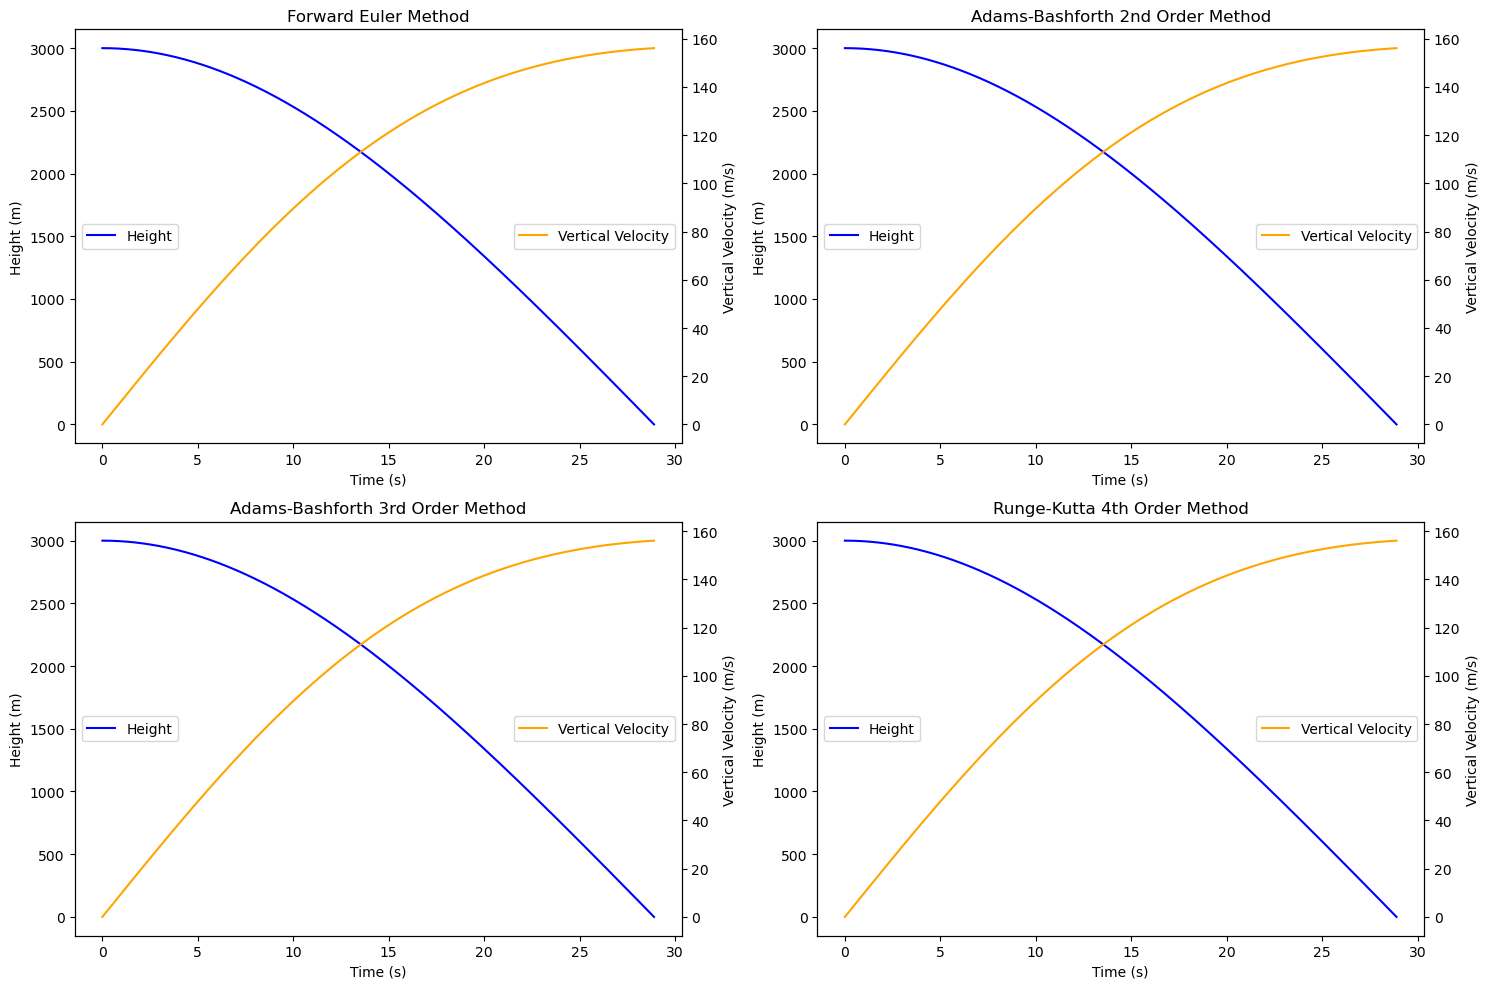

In [458]:
# 分别绘制四种方法的图

'''
ax1部分为高度
ax2部分为垂直速度
legend部分为添加图例
'''

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Forward Euler Method
ax1 = axs[0][0]
ax1.plot(t_arr_forward_euler, h_arr_forward_euler, 'b-', label='Height')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(t_arr_forward_euler, V_z_arr_forward_euler, 'orange', label='Vertical Velocity')
ax2.set_ylabel('Vertical Velocity (m/s)')
ax2.tick_params(axis='y')
ax1.set_title('Forward Euler Method')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Adams-Bashforth 2nd Order Method
ax1 = axs[0][1]
ax1.plot(t_arr_adams_bashforth_2nd_order, h_arr_adams_bashforth_2nd_order, 'b-', label='Height')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(t_arr_adams_bashforth_2nd_order, V_z_arr_adams_bashforth_2nd_order, 'orange', label='Vertical Velocity')
ax2.set_ylabel('Vertical Velocity (m/s)')
ax2.tick_params(axis='y')
ax1.set_title('Adams-Bashforth 2nd Order Method')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Adams-Bashforth 3rd Order Method
ax1 = axs[1][0]
ax1.plot(t_arr_adams_bashforth_3rd_order, h_arr_adams_bashforth_3rd_order, 'b-', label='Height')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(t_arr_adams_bashforth_3rd_order, V_z_arr_adams_bashforth_3rd_order, 'orange', label='Vertical Velocity')
ax2.set_ylabel('Vertical Velocity (m/s)')
ax2.tick_params(axis='y')
ax1.set_title('Adams-Bashforth 3rd Order Method')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Runge-Kutta 4th Order Method
ax1 = axs[1][1]
ax1.plot(t_arr_runge_kutta_4th_order, h_arr_runge_kutta_4th_order, 'b-', label='Height')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(t_arr_runge_kutta_4th_order, V_z_arr_runge_kutta_4th_order, 'orange', label='Vertical Velocity')
ax2.set_ylabel('Vertical Velocity (m/s)')
ax2.tick_params(axis='y')
ax1.set_title('Runge-Kutta 4th Order Method')

ax1.legend(loc='center left')
ax2.legend(loc='center right')

# 显示图表
plt.tight_layout()
plt.show()

绘制在同一个图中

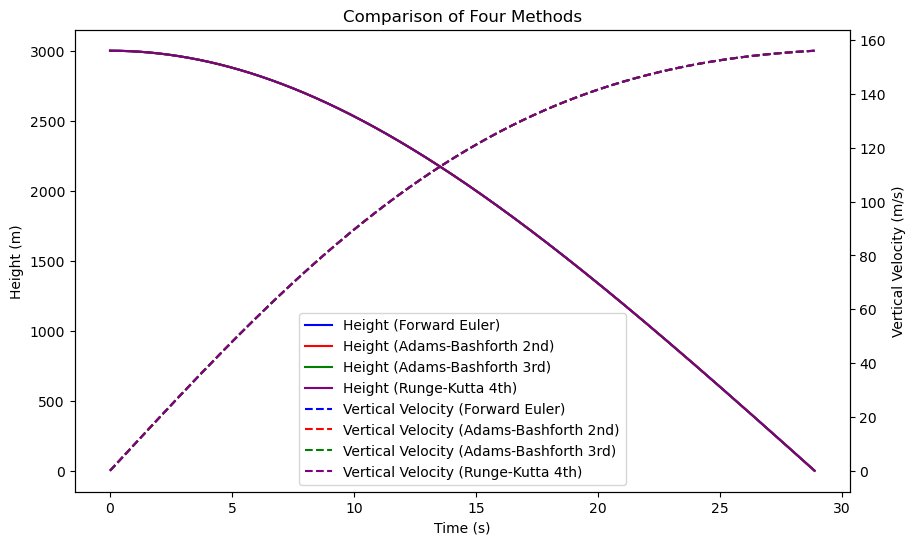

In [459]:
import matplotlib.pyplot as plt

# 创建图表和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 设置x轴标签
ax1.set_xlabel('Time (s)')

# 配置第一个y轴（左侧，高度）
ax1.set_ylabel('Height (m)')
line1 = ax1.plot(t_arr_forward_euler, h_arr_forward_euler, label='Height (Forward Euler)', linestyle='-', color='blue')
line2 = ax1.plot(t_arr_adams_bashforth_2nd_order, h_arr_adams_bashforth_2nd_order, label='Height (Adams-Bashforth 2nd)', linestyle='-', color='red')
line3 = ax1.plot(t_arr_adams_bashforth_3rd_order, h_arr_adams_bashforth_3rd_order, label='Height (Adams-Bashforth 3rd)', linestyle='-', color='green')
line4 = ax1.plot(t_arr_runge_kutta_4th_order, h_arr_runge_kutta_4th_order, label='Height (Runge-Kutta 4th)', linestyle='-', color='purple')

# 创建第二个y轴（右侧，速度）
ax2 = ax1.twinx()
ax2.set_ylabel('Vertical Velocity (m/s)')
line5 = ax2.plot(t_arr_forward_euler, V_z_arr_forward_euler, label='Vertical Velocity (Forward Euler)', linestyle='--', color='blue')
line6 = ax2.plot(t_arr_adams_bashforth_2nd_order, V_z_arr_adams_bashforth_2nd_order, label='Vertical Velocity (Adams-Bashforth 2nd)', linestyle='--', color='red')
line7 = ax2.plot(t_arr_adams_bashforth_3rd_order, V_z_arr_adams_bashforth_3rd_order, label='Vertical Velocity (Adams-Bashforth 3rd)', linestyle='--', color='green')
line8 = ax2.plot(t_arr_runge_kutta_4th_order, V_z_arr_runge_kutta_4th_order, label='Vertical Velocity (Runge-Kutta 4th)', linestyle='--', color='purple')

# 添加图表标题
plt.title('Comparison of Four Methods')

# 合并图例并放置在图表下部中间
lines = line1 + line2 + line3 + line4 + line5 + line6 + line7 + line8
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower center', ncol=1)

# 显示图表
plt.show()
